<a href="https://colab.research.google.com/github/GMZepeda/machine-learning-practice/blob/main/regresion-lineal/regresion_lineal_poblacion_ganancia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


In [2]:
import gdown

url = "https://raw.githubusercontent.com/BabesGotByte/DATA-MINING-Algorithms/main/ex1data1.txt"
gdown.download(url, 'population_profits.csv', quiet=False)

Downloading...
From: https://raw.githubusercontent.com/BabesGotByte/DATA-MINING-Algorithms/main/ex1data1.txt
To: /content/population_profits.csv
1.36kB [00:00, 2.93MB/s]                 


'population_profits.csv'

In [3]:
df = pd.read_csv("population_profits.csv", header=None, names=['population', 'profit'])
print(df.shape)
df.head(10)

(97, 2)


,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [5]:
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


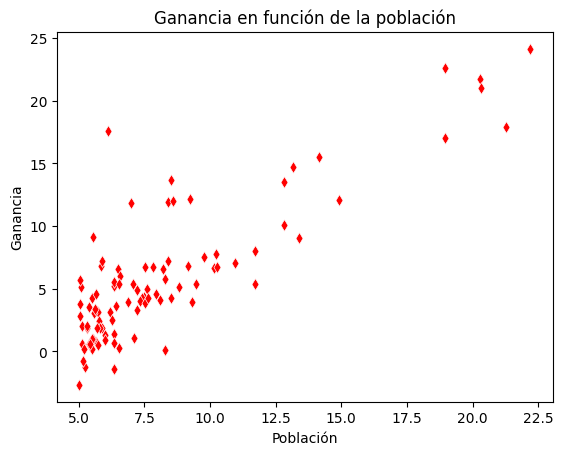

In [6]:
sns.scatterplot(x=df['population'],
                y=df['profit'],
              color='red', marker='d'),
plt.title("Ganancia en función de la población")
plt.xlabel("Población")
plt.ylabel("Ganancia")
plt.show()

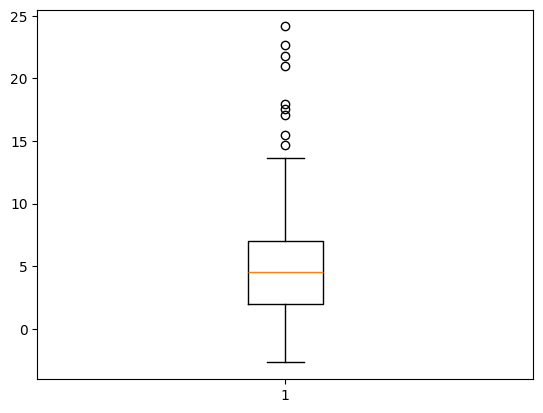

In [7]:
plt.boxplot(df['profit'])
plt.show()

In [8]:
correlacion = df.corr()
correlacion

,population,profit
population,1.000000,0.837873
profit,0.837873,1.000000


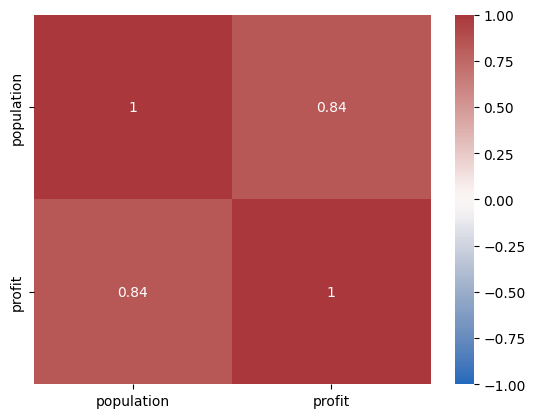

In [9]:
sns.heatmap(correlacion, annot=True, vmin=-1, vmax=1, cmap="vlag")
plt.show()

In [10]:
import statsmodels.formula.api as smf
model = smf.ols(formula='profit ~ population', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     223.8
Date:                Fri, 11 Jul 2025   Prob (F-statistic):           1.02e-26
Time:                        23:05:04   Log-Likelihood:                -243.95
No. Observations:                  97   AIC:                             491.9
Df Residuals:                      95   BIC:                             497.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8958      0.719     -5.415      0.0

In [11]:
y_pred = model.predict(df["population"])
df["Predicted_Profit"] = y_pred
df.head()

,population,profit,Predicted_Profit
0,6.1101,17.5920,3.393774
1,5.5277,9.1302,2.698951
2,8.5186,13.6620,6.267196
3,7.0032,11.8540,4.459272
4,5.8598,6.8233,3.095158


In [12]:
df

,population,profit,Predicted_Profit
0,6.1101,17.59200,3.393774
1,5.5277,9.13020,2.698951
2,8.5186,13.66200,6.267196
3,7.0032,11.85400,4.459272
4,5.8598,6.82330,3.095158
...,...,...,...
92,5.8707,7.20290,3.108162
93,5.3054,1.98690,2.433740
94,8.2934,0.14454,5.998524
95,13.3940,9.05510,12.083712


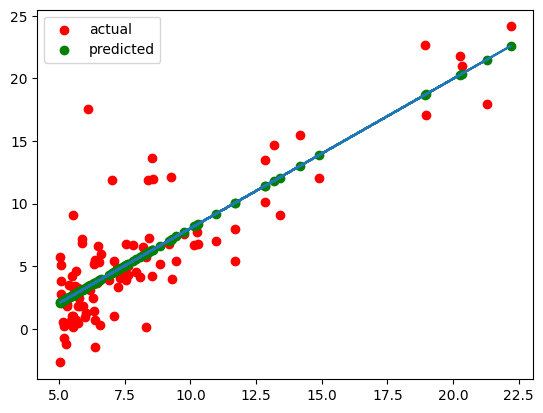

In [13]:
def mi_plot(x, y, y_pred):
    plt.scatter(x, y, color= "red",
                label="actual")
    plt.scatter(x, y_pred, color="green",
            label="predicted")
    plt.plot(x, y_pred)

    plt.legend(loc="upper left")

mi_plot(x=df["population"],
            y=df["profit"],
            y_pred=df["Predicted_Profit"])
plt.show()

In [14]:
from sklearn.metrics import r2_score
data = df
print("R2:", r2_score(data["profit"], data["Predicted_Profit"]))


R2: 0.7020315537841397


<Axes: xlabel='profit', ylabel='Count'>

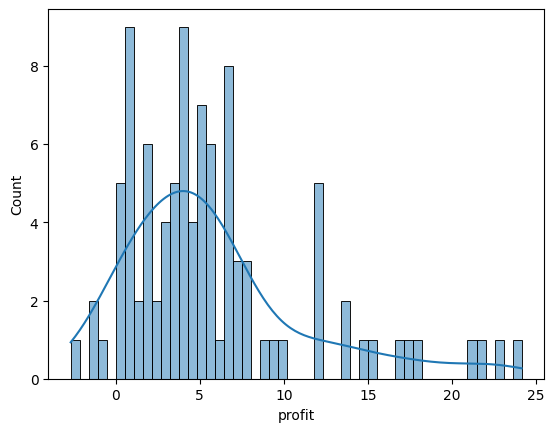

In [15]:
sns.histplot(data["profit"], bins=50, kde=True)


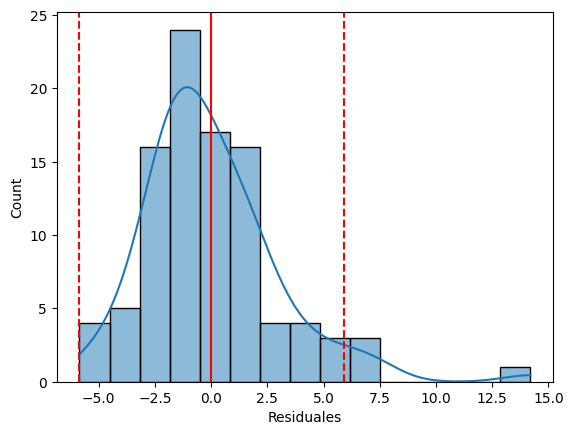

In [17]:
# Calculamos los residuos (errores): diferencia entre los valores reales y los predichos
residual = data["profit"] - y_pred

# Creamos un histograma de los residuos con 15 bins y una curva de densidad (kde=True)
sns.histplot(residual, bins=15, kde=True)
plt.xlabel("Residuales")

# Calculamos la media y desviación estándar de los residuos
mean = residual.mean()
std = residual.std()

# Dibujamos la línea vertical de la media en rojo
plt.axvline(mean, color="red", linestyle="-")

# Dibujamos líneas de intervalo de confianza del 95% (media ± 1.96 * std)
plt.axvline(mean + 1.96 * std, color="red", linestyle="--")
plt.axvline(mean - 1.96 * std, color="red", linestyle="--")

plt.show()

Este gráfico permite analizar si los errores del modelo (residuos) están distribuidos de forma normal y centrada en cero, lo cual es un buen signo.

¿Está bien el modelo?

Si la mayoría de los residuos está dentro de las líneas punteadas y el gráfico tiene forma aproximadamente simétrica (parecida a una campana), el modelo puede considerarse razonable.

En este caso, los residuos no están completamente centrados y la distribución es algo asimétrica, lo que indica que el modelo no está prediciendo de forma óptima. Aún hay margen para mejorar.



### Predicción